**Step 1: Data Preprocessing**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the data
data = pd.read_csv('/content/sample_data/heart.csv')

# Encode categorical data
label_encoder = LabelEncoder()
categorical_columns = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Scale the continuous variables
scaler = StandardScaler()
continuous_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
data[continuous_columns] = scaler.fit_transform(data[continuous_columns])

# Split data into features and target
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


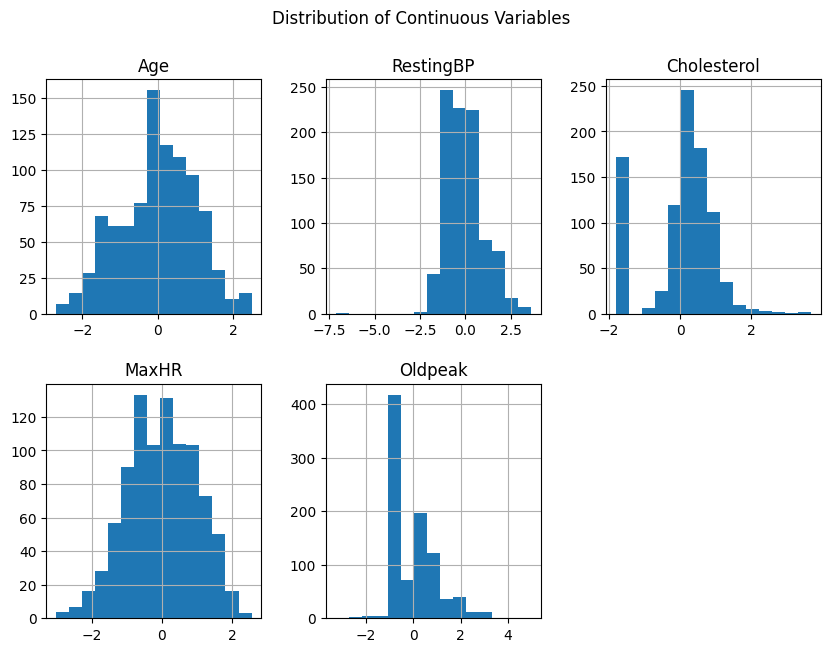

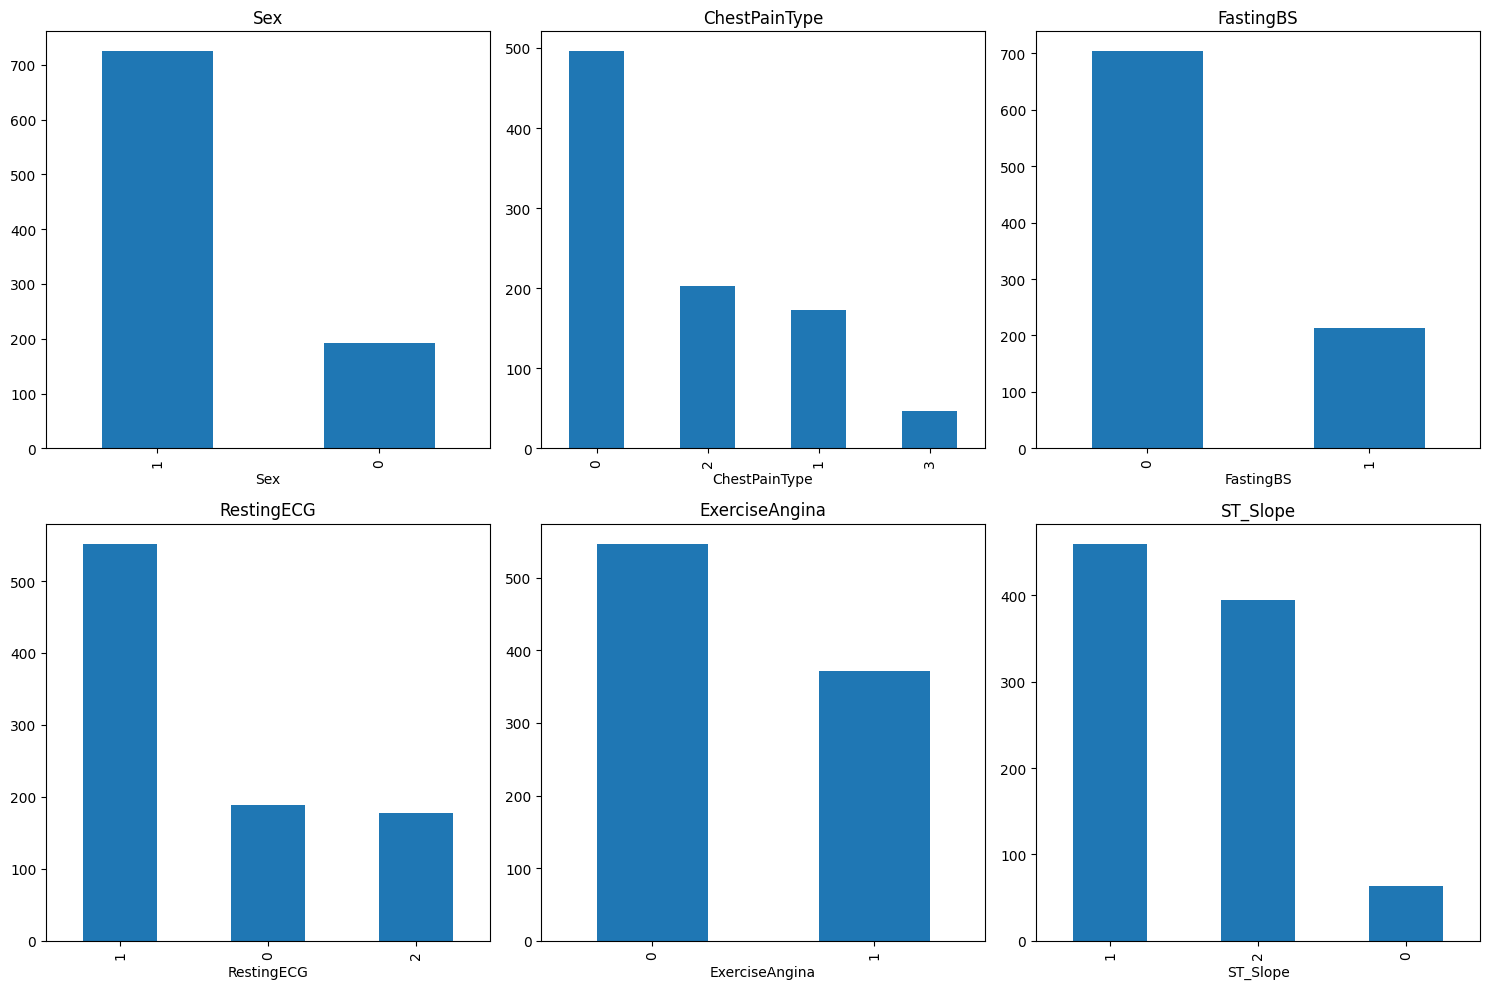

In [ ]:
import matplotlib.pyplot as plt

# Histograms for continuous variables
data[continuous_columns].hist(bins=15, figsize=(10, 7), layout=(2, 3))
plt.suptitle('Distribution of Continuous Variables')
plt.show()

# Bar charts for categorical variables
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
for ax, column in zip(axes.flatten(), categorical_columns):
    data[column].value_counts().plot(kind='bar', ax=ax, title=column)
plt.tight_layout()
plt.show()


**Step 2: Gaussian Process Regression**

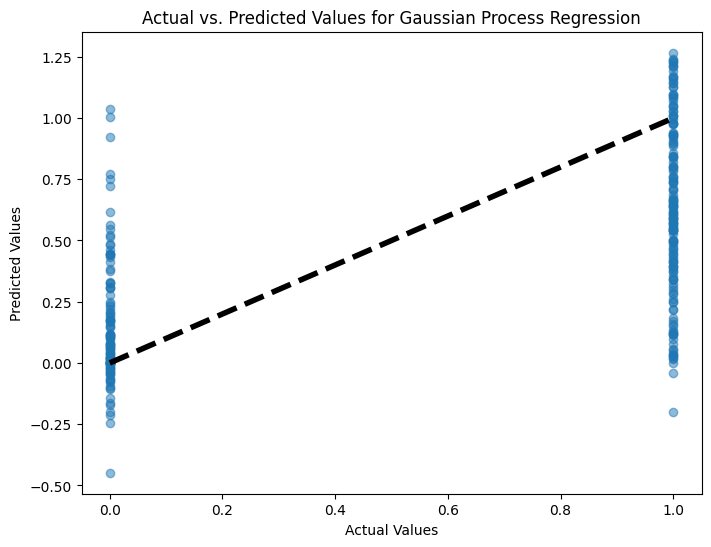

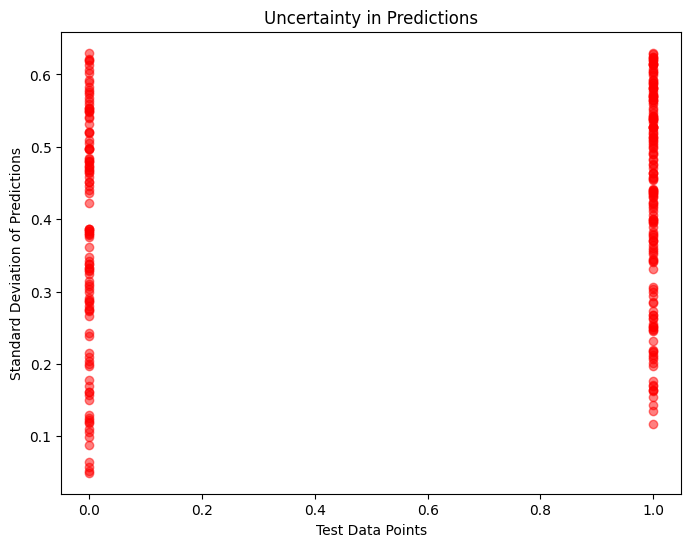

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Define the kernel using RBF
kernel = C(1.0, (1e-4, 1e1)) * RBF(1.0, (1e-4, 1e1))

# Create Gaussian Process Regressor object
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X_train, y_train)

# Make predictions
y_pred, sigma = gp.predict(X_test, return_std=True)
# Scatter plot of Actual vs. Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for Gaussian Process Regression')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.show()

# Plot standard deviations of predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, sigma, color='red', alpha=0.5)
plt.xlabel('Test Data Points')
plt.ylabel('Standard Deviation of Predictions')
plt.title('Uncertainty in Predictions')
plt.show()


**Step 3: Threshold and Gaussian Process Classification**

In [ ]:
# Assume a threshold (this should ideally be chosen based on domain knowledge or analysis)
threshold = 0.5
y_class = [1 if pred > threshold else 0 for pred in y_pred]

# Evaluate the classification
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_class))
print(classification_report(y_test, y_class))


Accuracy: 0.7536231884057971
              precision    recall  f1-score   support

           0       0.64      0.90      0.75       112
           1       0.91      0.65      0.76       164

    accuracy                           0.75       276
   macro avg       0.77      0.78      0.75       276
weighted avg       0.80      0.75      0.75       276



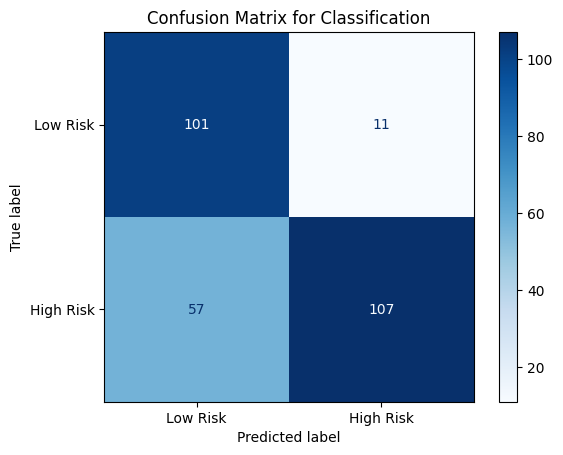

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low Risk', 'High Risk'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Classification')
plt.show()


**Step 4: Bayesian Network Modeling**

In [ ]:
pip install pgmpy


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

+-----------------+---------------------+
| HeartDisease    |   phi(HeartDisease) |
+=================+=====================+
| HeartDisease(0) |              0.5034 |
+-----------------+---------------------+
| HeartDisease(1) |              0.4966 |
+-----------------+---------------------+


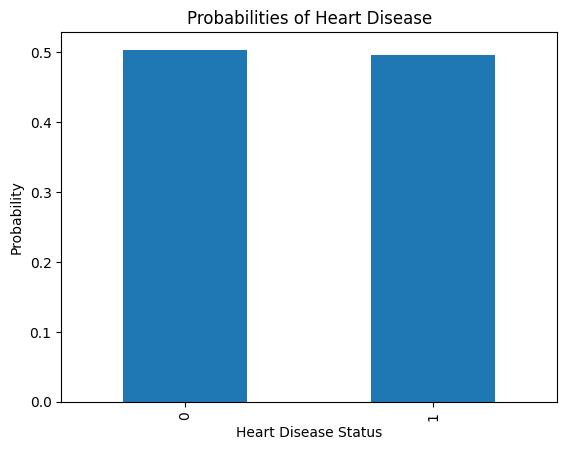

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import BayesianEstimator  # Using Bayesian Estimator for more robust parameter estimation

# Load and clean the data
data = pd.read_csv('/content/sample_data/heart.csv')
data.dropna(inplace=True)  # Ensure there are no NaN values

# Convert to numeric and handle non-numeric coercions to NaN
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
data['Cholesterol'] = pd.to_numeric(data['Cholesterol'], errors='coerce')

# Use a more controlled discretization
data['Age'] = pd.cut(data['Age'], bins=[0, 30, 60, 90], labels=['Young', 'Middle', 'Old'], include_lowest=True)
data['Cholesterol'] = pd.cut(data['Cholesterol'], bins=[100, 200, 300, 400], labels=['Low', 'Medium', 'High'], include_lowest=True)

# Rebuild the Bayesian Network
model = BayesianNetwork([
    ('Age', 'HeartDisease'),
    ('Cholesterol', 'HeartDisease'),
    ('MaxHR', 'HeartDisease'),
    ('ExerciseAngina', 'HeartDisease'),
    ('ST_Slope', 'HeartDisease')
])

# Fit the model using Bayesian Estimator which can handle sparse data better
model.fit(data, estimator=BayesianEstimator, prior_type='BDeu', equivalent_sample_size=10)

# Query the model
from pgmpy.inference import VariableElimination
infer = VariableElimination(model)
query_result = infer.query(variables=['HeartDisease'], evidence={'Age': 'Middle', 'Cholesterol': 'High'})
print(query_result)


# Assuming 'query_result' is the result from Bayesian inference and is a DiscreteFactor
# Extracting values and states from the DiscreteFactor object
states = query_result.state_names['HeartDisease']
probabilities = query_result.values

# Creating a DataFrame from the extracted data
query_result_df = pd.DataFrame({
    'HeartDisease': states,
    'Probability': probabilities
})

# Setting 'HeartDisease' as the index if desired
query_result_df.set_index('HeartDisease', inplace=True)

# Plotting the results as a bar chart
fig, ax = plt.subplots()
query_result_df.plot(kind='bar', ax=ax, legend=False)

# Setting the titles and labels
ax.set_title('Probabilities of Heart Disease')
ax.set_ylabel('Probability')
ax.set_xlabel('Heart Disease Status')

# Display the plot
plt.show()



**Step 5: Documentation and Reporting**

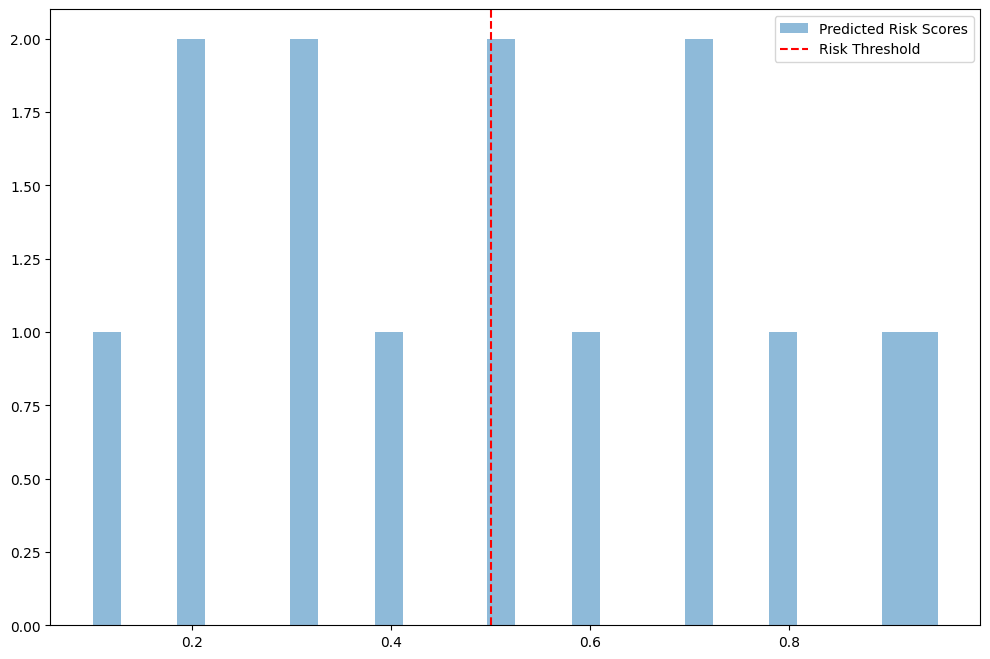

In [ ]:
# Generate plots, reports, and summaries as needed
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.hist(y_pred, bins=30, alpha=0.5, label='Predicted Risk Scores')
plt.axvline(x=threshold, color='r', linestyle='--', label='Risk Threshold')
plt.legend()
plt.show()
